## Data Gathering

In [1]:
#!pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Now we have plotted a heat map to visualize the correlation between the columns in the data set.

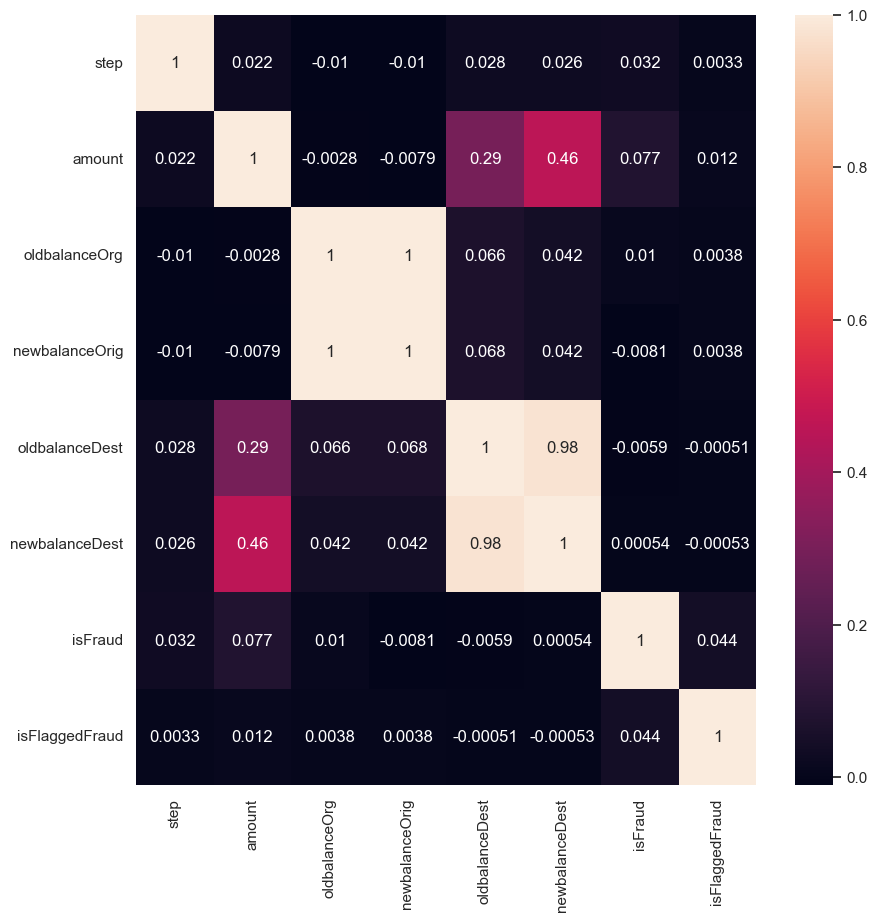

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the above heat map we can observe that there is high correlation between the columns 'oldbalanceOrg' and 'newbalanceOrig'. To confirm that we have also plotted the scatter plot with a regression line for these two columns.

<AxesSubplot:xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

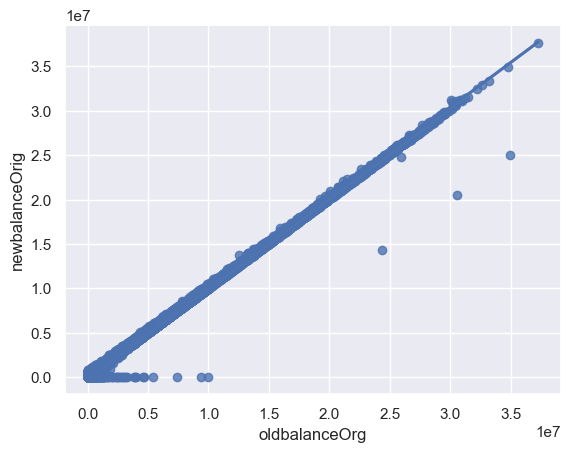

In [5]:
sns.regplot(x='oldbalanceOrg',y='newbalanceOrig',data=data.sample(100000))

## Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#Checking for null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

We have checked for null values and from the above output we can clearly observe that there are no null values in the data set.

In [8]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

We have dropped the nameOrig and nameDest attributes because their data type is string, which cannot be used in the SMOTE analysis for balancing the data. SMOTE works by generating synthetic samples based on the numerical attributes of the dataset, and therefore it cannot consider the string values. By removing these attributes, we can ensure that the SMOTE analysis is performed correctly and that the resulting dataset is suitable for training a machine learning model.


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'].astype(str))

We have used LabelEncoder to transform the 'type' attribute from a string data type to a numerical data type. SMOTE analysis typically require numerical inputs, so transforming categorical variables into numerical ones is a common data preprocessing step.


In [10]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


We have plotted a pie plot to check the distribution of values in 'isFraud' column as 'Fraud' and 'Not Fraud'.

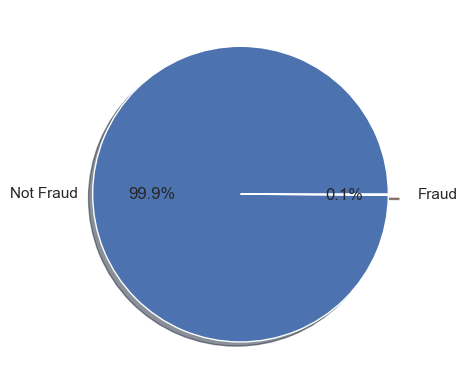

In [11]:
values = data['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

From the above pie plot we can clearly observe that only 0.1 percent of data is fraudulent. This means that the data is higly skewed.

## Balancing the data Using SMOTE Analysis

In [12]:
X = data.drop('isFraud', axis=1).values
y = data['isFraud'].values

In [13]:
# since the data is imbalanced, apply SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10, random_state=42)
X, y = sm.fit_resample(X, y)

In [14]:
X[:3], len(X)

(array([[1.0000000e+00, 3.0000000e+00, 9.8396400e+03, 1.7013600e+05,
         1.6029636e+05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.0000000e+00, 3.0000000e+00, 1.8642800e+03, 2.1249000e+04,
         1.9384720e+04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [1.0000000e+00, 4.0000000e+00, 1.8100000e+02, 1.8100000e+02,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]]),
 12708814)

In [15]:
y[:5]

array([0, 0, 1, 1, 0], dtype=int64)

Below is the count plot for 'isFraud' column after balancing the data.

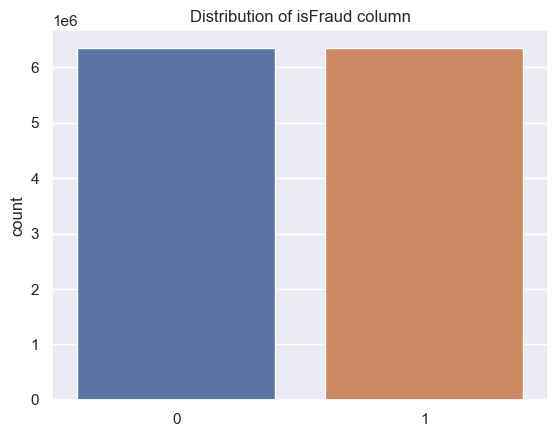

In [16]:
#dat = y.value_counts()
sns.countplot(y)
plt.title('Distribution of isFraud column')
plt.show()

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
X_train_subset, y_train_subset = X_train[:6000],y_train[:6000]
X_test_subset, y_test_subset = X_test[:6000],y_test[:6000]

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.9436843639631233

In [21]:
# Predictions on test set
from sklearn.metrics import accuracy_score, classification_report
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94   1270837
           1       0.96      0.92      0.94   1270926

    accuracy                           0.94   2541763
   macro avg       0.94      0.94      0.94   2541763
weighted avg       0.94      0.94      0.94   2541763



## Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC

np.random.seed(42)

svm = SVC(probability=True).fit(X_train_subset, y_train_subset)

In [23]:
svm.score(X_test_subset, y_test_subset)

0.8961666666666667

In [24]:
y_pred_svm = svm.predict(X_test_subset)
print(classification_report(y_test_subset, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2978
           1       0.95      0.84      0.89      3022

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



## K-Nearest Neighbour (k-NN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_subset, y_train_subset)

In [26]:
knn.score(X_test_subset, y_test_subset)

0.9313333333333333

In [27]:
y_pred_knn = knn.predict(X_test_subset)
print(classification_report(y_test_subset, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2978
           1       0.94      0.92      0.93      3022

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



## Calcuating ROC-AUC Score and Plotting ROC Curve

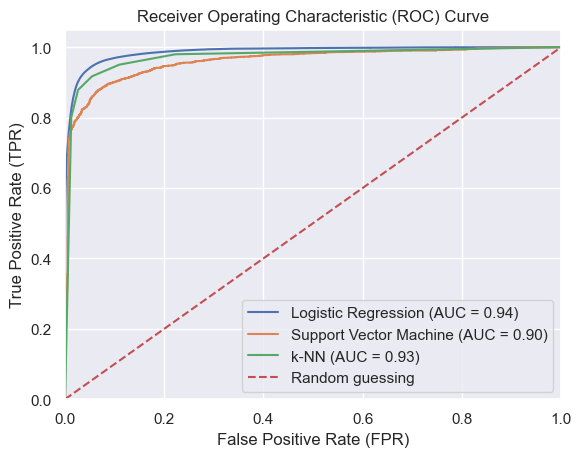

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# Logistic Regression
lr_roc_auc = roc_auc_score(y_test, y_pred_lr)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_roc_auc)

#svm
svm_roc_auc = roc_auc_score(y_test_subset, y_pred_svm)
svm_fpr, svm_tpr, _ = roc_curve(y_test_subset, svm.predict_proba(X_test_subset)[:,1])
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = %0.2f)' % svm_roc_auc)

# k-NN
knn_roc_auc = roc_auc_score(y_test_subset, y_pred_knn)
knn_fpr, knn_tpr, _ = roc_curve(y_test_subset, knn.predict_proba(X_test_subset)[:,1])
plt.plot(knn_fpr, knn_tpr, label='k-NN (AUC = %0.2f)' % knn_roc_auc)

# Random guessing
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC.png', dpi=300)
plt.show()

## Precision Recall Curve

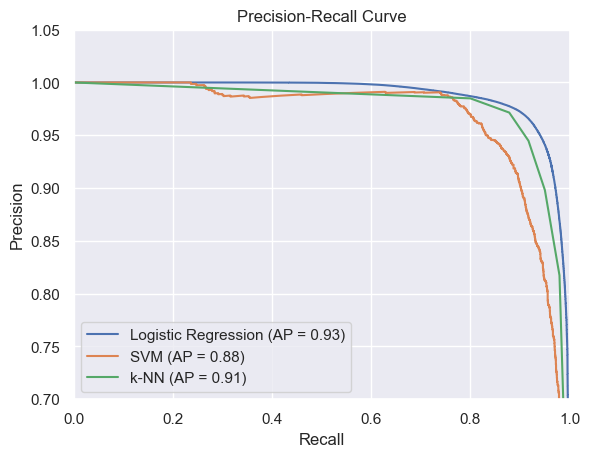

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Logistic Regression
lr_pr_auc = average_precision_score(y_test, lr.predict(X_test))
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(lr_recall, lr_precision, label='Logistic Regression (AP = %0.2f)' % lr_pr_auc)

# svm
svm_pr_auc = average_precision_score(y_test_subset, svm.predict(X_test_subset))
svm_precision, svm_recall, _ = precision_recall_curve(y_test_subset, svm.predict_proba(X_test_subset)[:,1])
plt.plot(svm_recall, svm_precision, label='SVM (AP = %0.2f)' % svm_pr_auc)

# k-NN
knn_pr_auc = average_precision_score(y_test_subset, knn.predict(X_test_subset))
knn_precision, knn_recall, _ = precision_recall_curve(y_test_subset, knn.predict_proba(X_test_subset)[:,1])
plt.plot(knn_recall, knn_precision, label='k-NN (AP = %0.2f)' % knn_pr_auc)

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('PR.png', dpi=300)
plt.show()

## Confusion Matrix for Logistic Regression

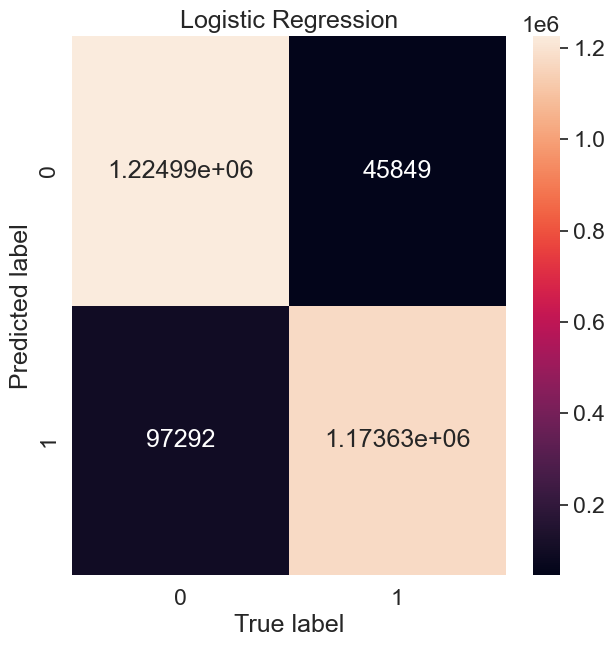

In [30]:
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred_lr):
  fig, ax = plt.subplots(figsize=(7,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='g', ax=ax)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  ax.set_title('Logistic Regression')

plot_conf_mat(y_test, y_pred_lr)

## Confusion Matrix for SVM

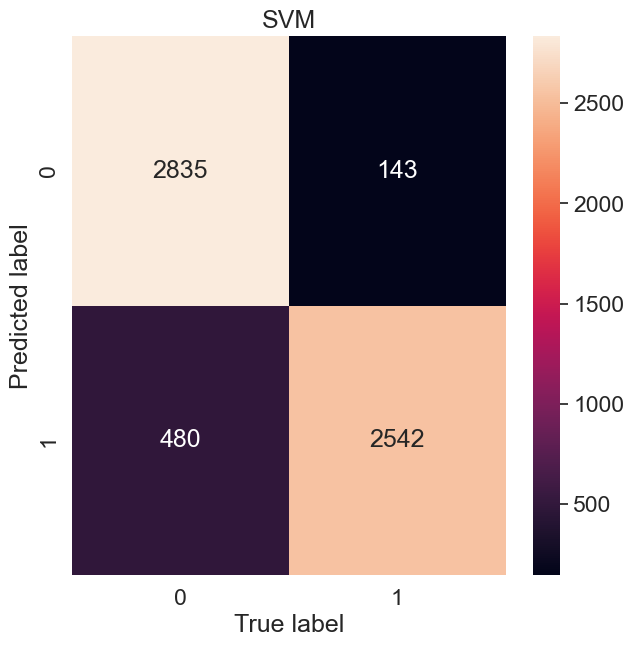

In [31]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test_subset, y_pred_svm):
  fig, ax = plt.subplots(figsize=(7,7))
  ax = sns.heatmap(confusion_matrix(y_test_subset, y_pred_svm), annot=True, fmt='g', ax=ax)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
  ax.set_title('SVM')

plot_conf_mat(y_test_subset, y_pred_svm)

## Confusion Matrix for k-NN

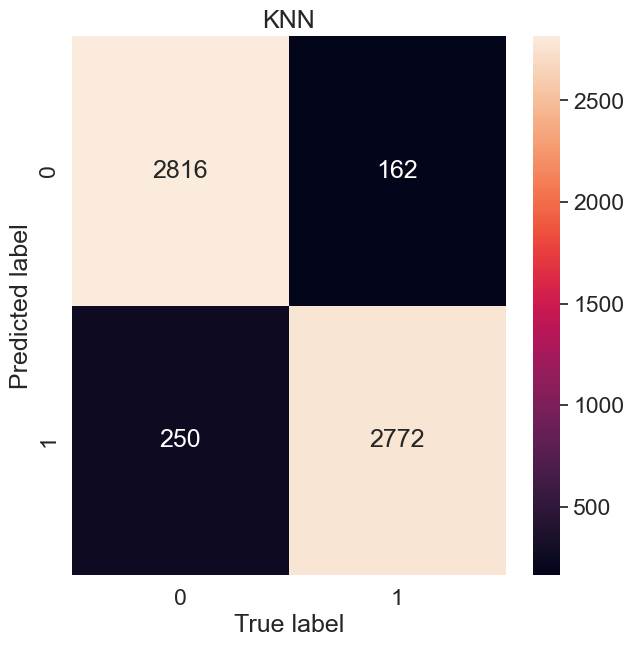

In [32]:
def plot_conf_mat(y_test_subset, y_pred_knn):
    fig, ax = plt.subplots(figsize=(7,7))
    ax = sns.heatmap(confusion_matrix(y_test_subset, y_pred_knn), annot=True, fmt='g', ax=ax)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    ax.set_title('KNN')

# Plot confusion matrix
plot_conf_mat(y_test_subset, y_pred_knn)